In [1]:
import numpy as np
from neuralStellar2 import *
import pymc3 as pm
import corner
import seaborn as sns
import theano.tensor as T
import theano
import os
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def predict(model, inputs):
    inputs[2]=10**inputs[2]
    outputs = model.predict(np.log10(inputs).T).T
    [rad, Teff, delnu] = 10**outputs
    Teff = Teff*5000
    L = rad**2*(Teff/5776.02970722)**4
    return [L, Teff, delnu]

In [3]:
m1=NNmodel('evo',['mass','age','feh','MLT'],['radius','Teff','delnu'], Teff_scaling=5000)
m1.loadModel('Ran_files/big_grid_59v1(h)/000_best_model.h5')

Model: "neuralstellar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5)                 20        
_________________________________________________________________
dense_33 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 128)             

In [4]:
M67_df = pd.read_csv('M67_with_luminosities.csv')
selected_ID = np.load('pymc3_traces/M67_15/cluster_ID.npy')
selected = M67_df.loc[M67_df['EPIC_ID'].isin(selected_ID)]
N = len(selected_ID)
selected[['EPIC_ID', 'delta_nu', 'delta_nu_err', 'Teff/K', 'Teff/K_err', 'luminosity', 'Mgrid', 'Mgrid_err', 'Agegrid', 'Agegrid_err']]

,EPIC_ID,delta_nu,delta_nu_err,Teff/K,Teff/K_err,luminosity,Mgrid,Mgrid_err,Agegrid,Agegrid_err
0,211414329.0,0.47,0.15,3960.0,92.0,470.138486,1.25,0.28,5.3,4.2
1,211407537.0,1.38,0.04,4250.0,126.0,146.346265,1.15,0.14,7.2,3.2
2,211409660.0,1.28,0.13,4256.0,116.0,154.266268,1.30,0.29,4.6,4.0
3,211403356.0,1.66,0.04,4391.0,97.0,156.247198,1.06,0.09,9.6,3.0
4,211380313.0,2.27,0.15,4391.0,78.0,95.986960,1.14,0.19,7.5,4.1
5,211410817.0,2.53,0.12,4422.0,92.0,75.753060,1.45,0.27,3.1,2.1
6,211406540.0,4.59,0.29,4707.0,107.0,52.407513,1.23,0.15,5.7,2.7
7,211406541.0,4.27,0.07,4663.0,68.0,43.779370,0.99,0.04,12.3,1.8
8,211418433.0,4.18,0.72,4681.0,73.0,54.565534,1.33,0.06,4.4,0.7
9,211410523.0,3.95,0.08,4714.0,117.0,61.547508,1.63,0.23,2.3,1.1


0     0.010090
1     0.012876
2     0.011837
3     0.009594
4     0.007715
5     0.009036
6     0.009872
7     0.006333
8     0.006773
9     0.010779
10    0.010193
11    0.008264
12    0.014165
13    0.010426
14    0.006583
15    0.013208
16    0.026195
17    0.006364
18    0.013218
19    0.013434
20    0.006537
21    0.007162
22    0.006929
23    0.009822
24    0.006149
25    0.007001
26    0.010725
27    0.009851
28    0.005493
29    0.006443
dtype: float64


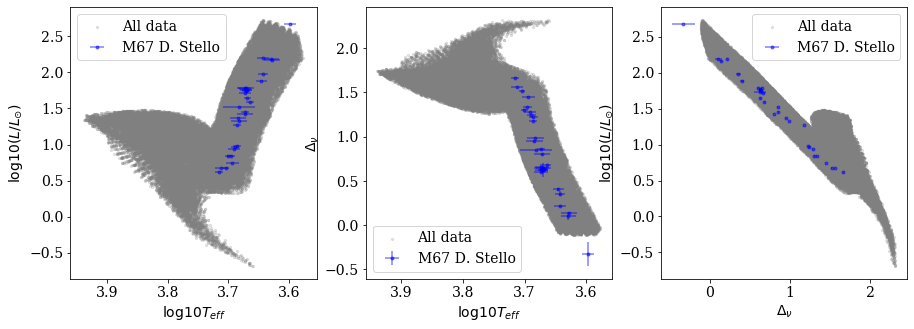

In [35]:
df = pd.read_csv('grid2_trun.csv')
points = df[:100000]
log_Teff_err = selected['Teff/K_err']/(selected['Teff/K']*np.log(10))
log_delnu_err = selected['delta_nu_err']/(selected['delta_nu']*np.log(10))
fig, ax=plt.subplots(1,3, figsize=(15,5))
#ax[0].scatter(np.log10(selected['Teff/K']), np.log10(selected['luminosity']), s=10, zorder=2, c='blue', alpha=0.5, label='M67 D. Stello')
ax[0].scatter(np.log10(points['effective_T']),np.log10(points['luminosity']),s=5,zorder=1,c='gray',alpha=0.2,label='All data')
ax[0].errorbar(np.log10(selected['Teff/K']), np.log10(selected['luminosity']), xerr=log_Teff_err, 
               fmt='.',zorder=2, c='blue', alpha=0.5, label='M67 D. Stello')
ax[0].set_xlim(ax[0].get_xlim()[::-1])
ax[0].set_xlabel(r'$\log10 T_{eff}$')
ax[0].set_ylabel(r'$\log10(L/L_{\odot})$')
ax[0].legend()

#ax[1].scatter(np.log10(selected['Teff/K']), np.log10(selected['delta_nu']), s=10, zorder=2, c='blue', alpha=0.5, label='M67 D. Stello')
ax[1].errorbar(np.log10(selected['Teff/K']), np.log10(selected['delta_nu']), xerr=log_Teff_err, yerr=log_delnu_err, 
               fmt='.',zorder=2, c='blue', alpha=0.5, label='M67 D. Stello')
ax[1].scatter(np.log10(points['effective_T']),np.log10(points['delta_nu']),s=5,zorder=1,c='gray',alpha=0.2,label='All data')
ax[1].set_xlim(ax[1].get_xlim()[::-1])
ax[1].set_xlabel(r'$\log10 T_{eff}$')
ax[1].set_ylabel(r'$\Delta_\nu$')
ax[1].legend()

#ax[2].scatter(np.log10(selected['delta_nu']), np.log10(selected['luminosity']), s=10, zorder=2, c='blue', alpha=0.5, label='M67 D. Stello')
ax[2].errorbar(np.log10(selected['delta_nu']), np.log10(selected['luminosity']), xerr=log_delnu_err, 
               fmt='.',zorder=2, c='blue', alpha=0.5, label='M67 D. Stello')
ax[2].scatter(np.log10(points['delta_nu']),np.log10(points['luminosity']),s=5,zorder=1,c='gray',alpha=0.2,label='All data')
ax[2].set_xlabel(r'$\Delta_\nu$')
ax[2].set_ylabel(r'$\log10(L/L_{\odot})$')
ax[2].legend()
plt.show()

In [6]:
model = pm.Model()
with model:
    Age_mu = pm.Deterministic('mean_age',pm.Beta('a',1.1,1.1)*2+3)
    Age_sigma = pm.Deterministic('spread_age',pm.Beta('b',1.1,1.1)*0.5)
    feh_mu = pm.Deterministic('mean_feh',pm.Beta('e',1.1,1.1)*0.4-0.2)
    Y_mu = pm.Deterministic('mean_Y',pm.Beta('f',1.1,1.1)*0.04+0.26)
    MLT_mu = pm.Deterministic('mean_MLT',pm.Beta('g',1.1,1.1)*0.4+1.7)
    
    M = pm.Deterministic('mass', pm.Beta('d',1.1,1.1,shape=N)*(1.5-1.0)+1.0)
    Age = pm.Deterministic('age',pm.Normal('age_normal', 0, 1, shape=N)*Age_sigma+Age_mu)
    feh = pm.Deterministic('feh',T.ones(N)*feh_mu)
    Y = pm.Deterministic('Y',T.ones(N)*Y_mu)
    MLT = pm.Deterministic('MLT',T.ones(N)*MLT_mu)
    
    obs = pm.Deterministic('obs',m1.manualPredict(T.log10([M, Age, 10**feh, Y, MLT])))
    
    true_Teff = pm.Deterministic('true_Teff', 10**obs[1,:]*5000)
    true_L = pm.Deterministic('true_L', (10**obs[0,:])**2*(true_Teff/5776.02970722)**4)
    true_delnu = pm.Deterministic('true_delnu', 10**obs[2,:])
    
    obs_L = pm.Normal('obs_L',true_L,sigma=None, observed=selected['luminosity'])
    obs_Teff = pm.Normal('obs_Teff',true_Teff,sigma=selected['Teff/K_err'], observed=selected['Teff/K'])
    obs_delnu = pm.Normal('obs_delnu',true_delnu,sigma=selected['delta_nu_err'], observed=selected['delta_nu'])

In [9]:
trace = pm.load_trace(directory='pymc3_traces/M67_15', model=model)
pm.summary(trace, var_names=['mean_age','spread_age','mean_feh','mean_Y','mean_MLT'])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mean_age,4.213,0.025,4.186,4.239,0.017,0.015,2.0,2.0,3.0,12.0,2.25
spread_age,0.250,0.000,0.250,0.250,0.000,0.000,2.0,2.0,3.0,12.0,2.12
mean_feh,0.004,0.002,0.002,0.006,0.001,0.001,2.0,2.0,3.0,11.0,2.23
mean_Y,0.280,0.002,0.278,0.282,0.001,0.001,2.0,2.0,3.0,11.0,2.23
mean_MLT,1.900,0.000,1.899,1.900,0.000,0.000,2.0,2.0,3.0,11.0,2.04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78B079F60>,
      dtype=object)

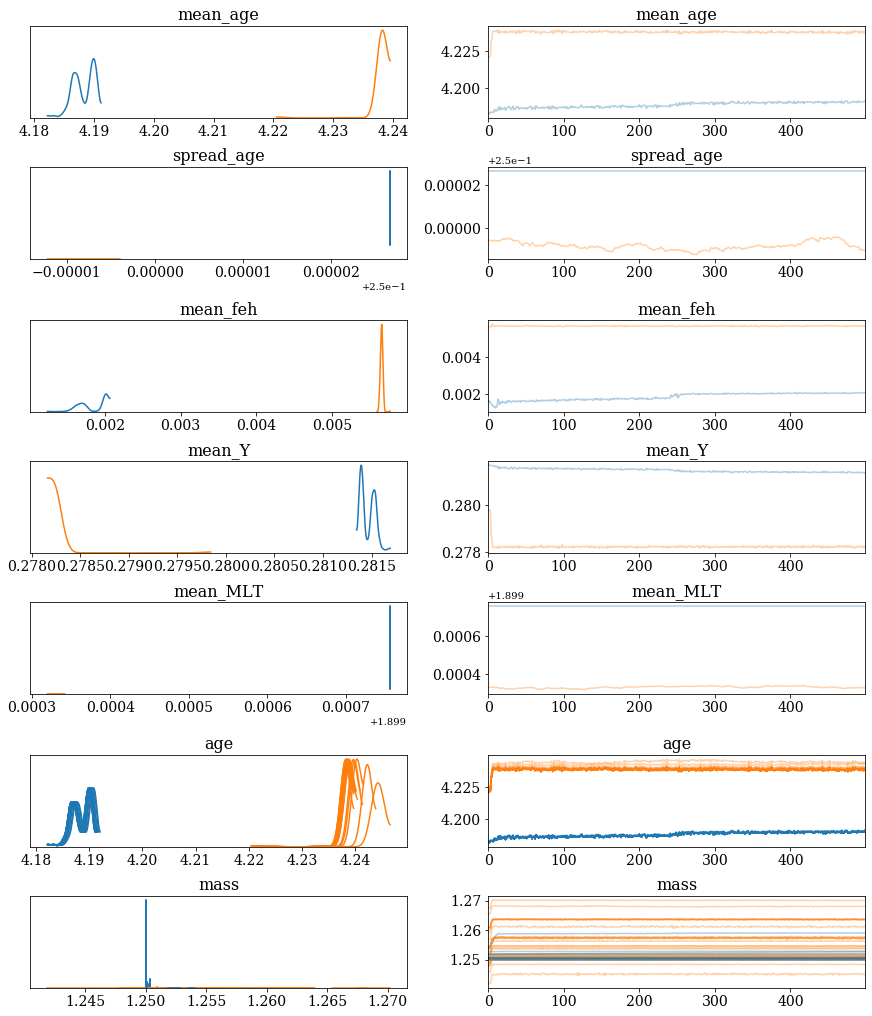

In [8]:
pm.plots.traceplot(trace,var_names=['mean_age','spread_age','mean_feh','mean_Y','mean_MLT','age','mass'],compact=True)

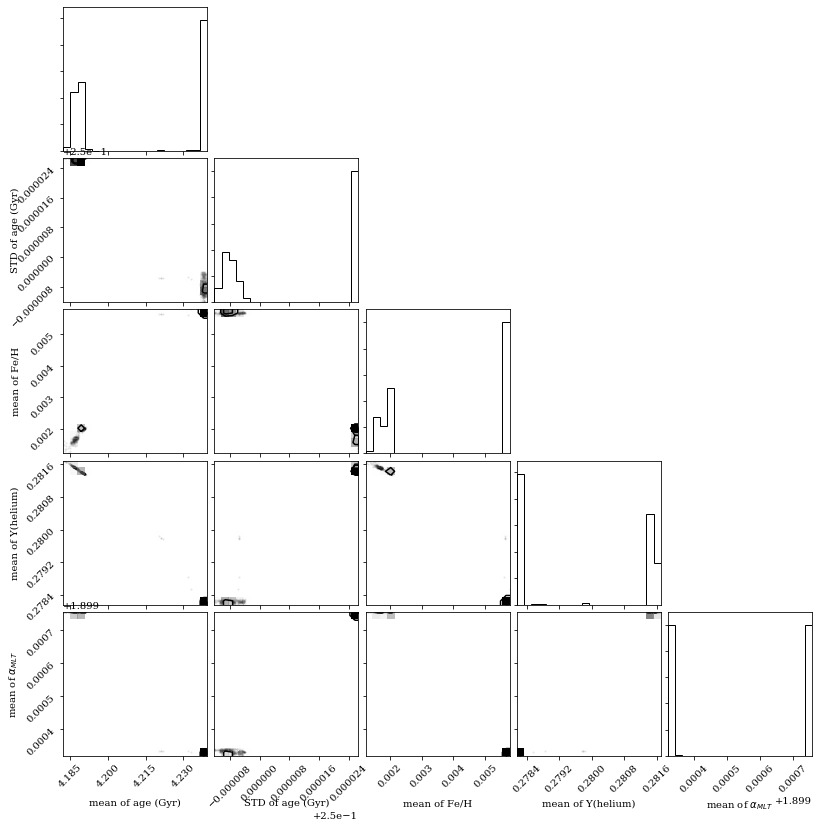

211413402.0


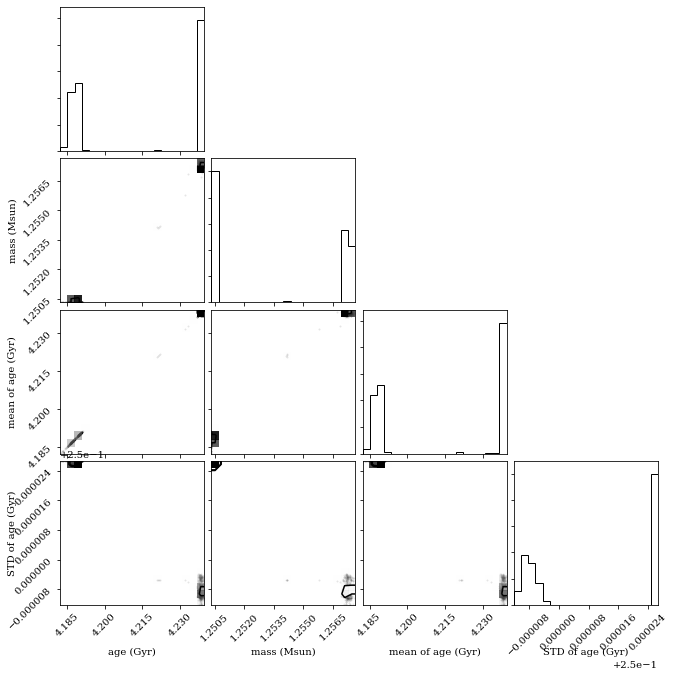

211380313.0


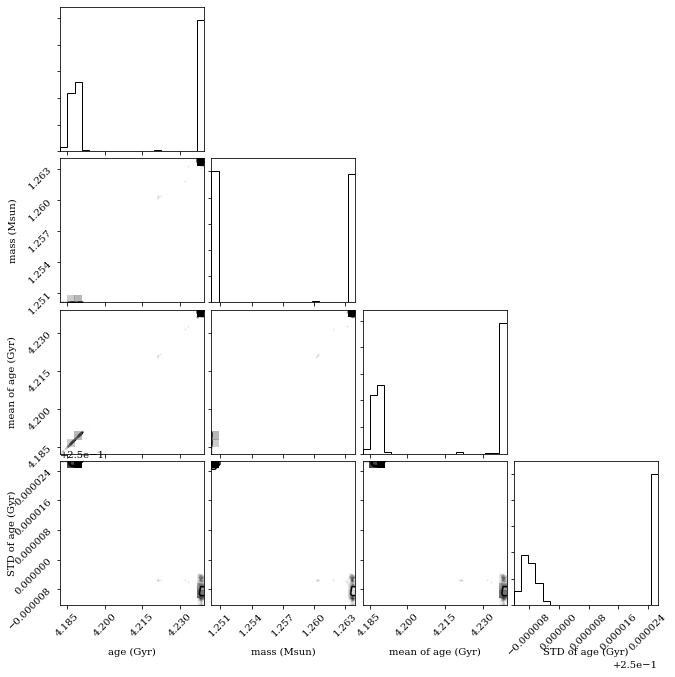

211418433.0


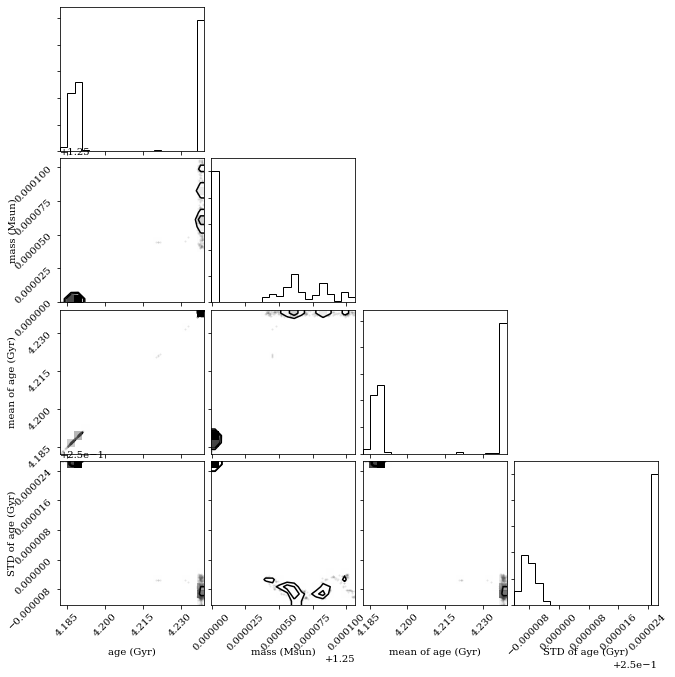

211409088.0


KeyboardInterrupt: 

In [10]:
corner.corner(np.array([trace['mean_age'],trace['spread_age'],trace['mean_feh'],trace['mean_Y'],trace['mean_MLT']]).T,
              labels=['mean of age (Gyr)','STD of age (Gyr)','mean of Fe/H','mean of Y(helium)',r'mean of $\alpha_{MLT}$'])
plt.show()
for i in [0,1,2,3,4]:
    print(selected_ID[i])
    this_star = selected[selected['EPIC_ID']==selected_ID[i]]
    ages = trace['age'].T[i]
    masses = trace['mass'].T[i]
    corner.corner(np.array([ages,masses,trace['mean_age'],trace['spread_age']]).T,
                  truths = [float(this_star['Agegrid']),float(this_star['Mgrid']),3.6,0.1],
                  labels=['age (Gyr)','mass (Msun)','mean of age (Gyr)','STD of age (Gyr)'])
    plt.show()

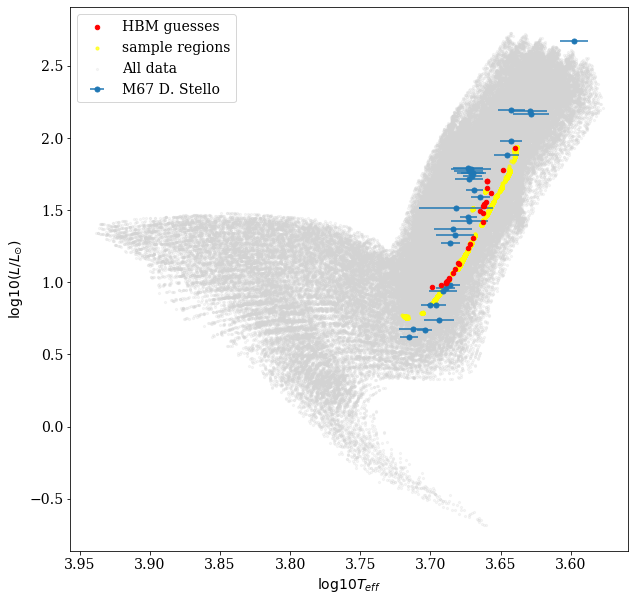

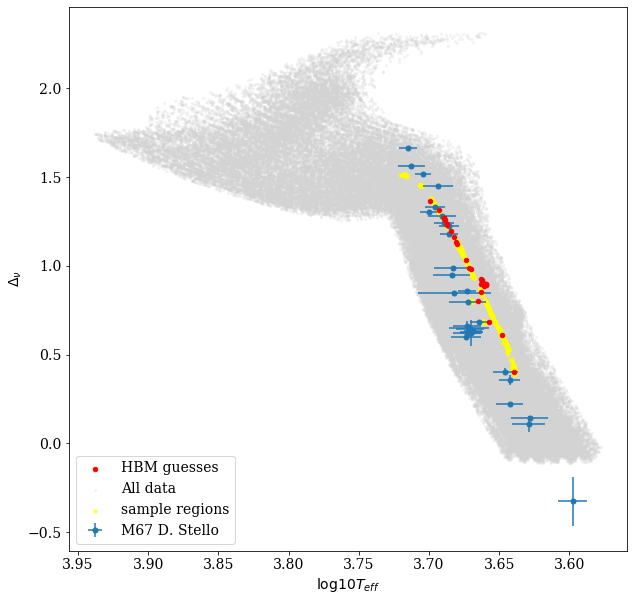

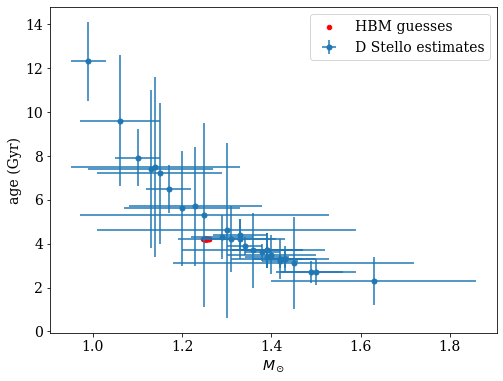

In [36]:
from matplotlib import rc
rc("font", family="serif", size=14)
HBM_ages = np.mean(trace['age'],axis=0)
HBM_masses = np.mean(trace['mass'],axis=0)
#[FL, FTeff, Fdelnu] = predict(m1.model, [HBM_masses, HBM_ages, np.zeros(N), np.ones(N)*0.28, np.ones(N)*1.9])
FL = np.mean(trace['true_L'],axis=0)
FTeff = np.mean(trace['true_Teff'],axis=0)
Fdelnu = np.mean(10**trace['obs'][:,2,:],axis=0)

fig, ax=plt.subplots(1,1,figsize=[10,10])
#ax.scatter(np.log10(selected['Teff/K']), np.log10(selected['luminosity']), s=20, zorder=4, label='D Stello data')
ax.errorbar(np.log10(selected['Teff/K']), np.log10(selected['luminosity']), xerr=log_Teff_err, 
               fmt='.',ms=10,zorder=3, label='M67 D. Stello')
ax.scatter(np.log10(FTeff), np.log10(FL), s=20, zorder=4, color='red', label='HBM guesses')
ax.scatter(np.log10(trace['true_Teff']), np.log10(trace['true_L']), s=10, zorder=2, alpha=0.7, color='yellow', label='sample regions')
ax.scatter(np.log10(points['effective_T']),np.log10(points['luminosity']),s=5,zorder=1,c='lightgrey',alpha=0.2,label='All data')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel(r'$\log10 T_{eff}$')
ax.set_ylabel(r'$\log10(L/L_{\odot})$')
ax.legend()
plt.show()

fig, ax=plt.subplots(1,1, figsize=(10,10))
#ax.scatter(np.log10(selected['Teff/K']), np.log10(selected['delta_nu']), s=20, zorder=4, label='D Stello data')
ax.errorbar(np.log10(selected['Teff/K']), np.log10(selected['delta_nu']), xerr=log_Teff_err, yerr=log_delnu_err, 
               fmt='.',ms=10,zorder=3, label='M67 D. Stello')
ax.scatter(np.log10(FTeff), np.log10(Fdelnu), s=20, zorder=4, color='red', label='HBM guesses')
ax.scatter(np.log10(points['effective_T']),np.log10(points['delta_nu']),s=5,zorder=1,c='lightgrey',alpha=0.2,label='All data')
ax.scatter(np.log10(trace['true_Teff']), np.log10(10**trace['obs'][:,2,:]), s=10, zorder=2, alpha=0.7, color='yellow', label='sample regions')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel(r'$\log10 T_{eff}$')
ax.set_ylabel(r'$\Delta_\nu$')
ax.legend()
plt.show()

fig, ax=plt.subplots(1,1,figsize=[8,6])
#ax.scatter(selected['Mgrid'], selected['Agegrid'],s=20, label='D Stello estimates')
ax.errorbar(selected['Mgrid'], selected['Agegrid'], xerr=selected['Mgrid_err'], yerr=selected['Agegrid_err'],fmt='.',ms=10, label='D Stello estimates')
ax.scatter(HBM_masses, HBM_ages, s=20, c='red', label='HBM guesses')
ax.set_xlabel(r'$M_\odot$')
ax.set_ylabel(r'age (Gyr)')
ax.legend()
plt.show()

In [44]:
gaia_df = pd.read_csv('GAIA_M67_data.csv')
gaia_df.dropna(subset=['teff_val','lum_val'], inplace=True)

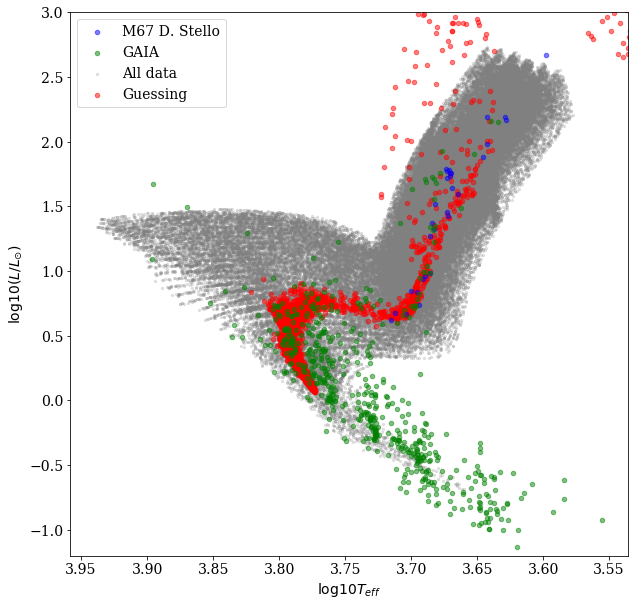

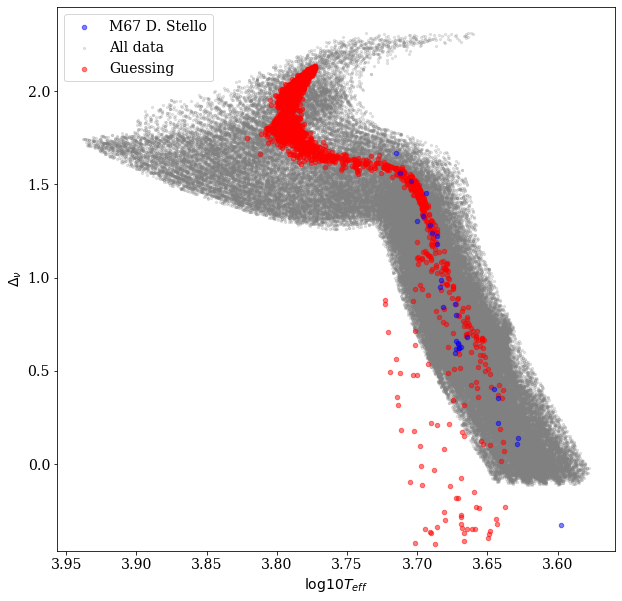

In [138]:
#N = len(M67_df.index)
N=5000
Tage = np.random.randn(N)*0.5+4
Tmass = np.random.rand(N)*(1.5-1.0)+1.0
Tfeh = np.random.randn(N)*0
TY = np.random.randn(N)*0+0.28
TMLT = np.ones(N)*1.9

[TL, TTeff, Tdelnu] = predict(m1.model,[Tmass,Tage,Tfeh,TY,TMLT])
fig, ax=plt.subplots(1,1, figsize=(10,10))
ax.scatter(np.log10(M67_df['Teff/K']), np.log10(M67_df['luminosity']), s=20, zorder=3, c='blue', alpha=0.5, label='M67 D. Stello')
ax.scatter(np.log10(gaia_df['teff_val']),np.log10(gaia_df['lum_val']), s=20, zorder=3, c='green', alpha=0.5, label='GAIA')
ax.scatter(np.log10(points['effective_T']),np.log10(points['luminosity']),s=5,zorder=1,c='gray',alpha=0.2,label='All data')
x_lim = ax.get_xlim()
ax.scatter(np.log10(TTeff),np.log10(TL),s=20,zorder=2,c='red',alpha=0.5,label='Guessing')
ax.set_xlim(x_lim[::-1])
ax.set_xlabel(r'$\log10 T_{eff}$')
ax.set_ylabel(r'$\log10(L/L_{\odot})$')
ax.set_ylim([-1.2,3])
ax.legend()
plt.show()

fig, ax=plt.subplots(1,1, figsize=(10,10))
ax.scatter(np.log10(M67_df['Teff/K']), np.log10(M67_df['delta_nu']), s=20, zorder=3, c='blue', alpha=0.5, label='M67 D. Stello')
ax.scatter(np.log10(points['effective_T']),np.log10(points['delta_nu']),s=5,zorder=1,c='gray',alpha=0.2,label='All data')
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax.scatter(np.log10(TTeff),np.log10(Tdelnu),s=20,zorder=2,c='red',alpha=0.5,label='Guessing')
ax.set_xlim(x_lim[::-1])
ax.set_ylim(y_lim)
ax.set_xlabel(r'$\log10 T_{eff}$')
ax.set_ylabel(r'$\Delta_\nu$')
ax.legend()
plt.show()

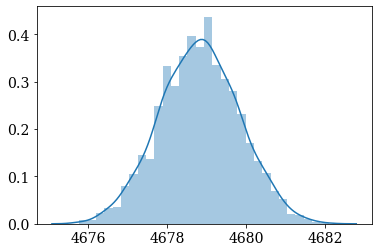

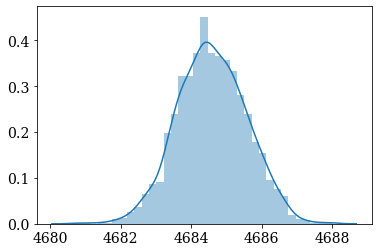

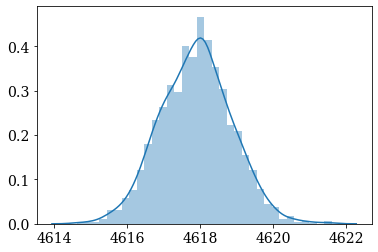

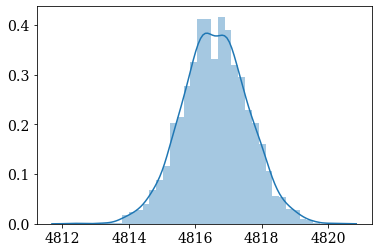

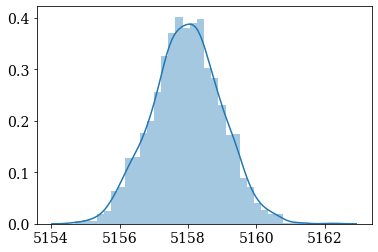

In [94]:
for i in trace['true_Teff'].T:
    sns.distplot(i)
    plt.show()